In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'nearest'
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
print(digits)

{'data': array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ..

In [4]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [5]:
print(digits.images.shape)
np.all(digits.data[0].reshape((8, 8)) == digits.images[0])

(1797, 8, 8)


True

target:  0


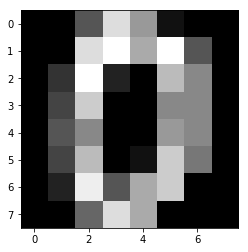

In [6]:
plt.imshow(digits.images[0], cmap='gray')
print("target: ", digits.target[0])

In [7]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [8]:
clf.fit(digits.data[:-10], digits.target[:-10])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[9 8]


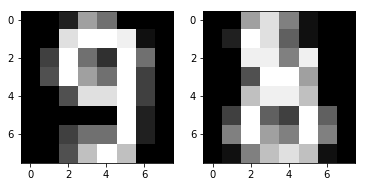

In [9]:
print(clf.predict(digits.data[-2:]))
fig, axes = plt.subplots(1, 2)
axes[0].imshow(digits.images[-2], cmap='gray')
axes[1].imshow(digits.images[-1], cmap='gray')

# thresholding and vector quantization

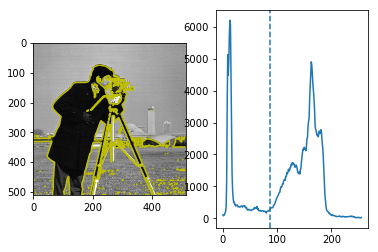

In [10]:
from skimage import data, exposure, filters
camera = data.camera()


hi = exposure.histogram(camera)
val = filters.threshold_otsu(camera)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(camera, cmap='gray')
axes[0].contour(camera, [val], colors='y')
axes[1].plot(hi[1], hi[0])
axes[1].axvline(val, ls='--')

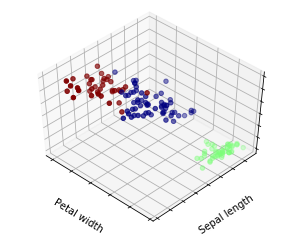

In [11]:

# From http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = KMeans(n_clusters=3)
              
fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
clf.fit(X)
labels = clf.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), cmap='jet')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

In [17]:
from skimage import io, color
import os
im = io.imread("E:/machine learning/Skimage_tutorials/round_pill.jpg")

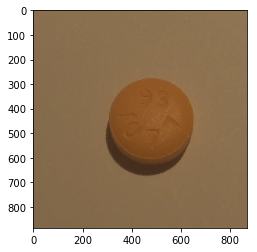

In [18]:
plt.imshow(im)

In [19]:
im_lab = color.rgb2lab(im)
data = np.array([im_lab[..., 1].ravel(), im_lab[..., 2].ravel()])

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data.T)
segmentation = kmeans.labels_.reshape(im.shape[:-1])

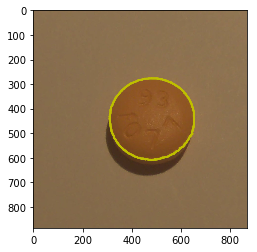

In [21]:
plt.imshow(im)
plt.contour(segmentation, colors='y')

In [34]:
im = io.imread('E:/machine learning/Skimage_tutorials/chapel_floor.png')
im_lab = color.rgb2lab(im)
data = np.array([im_lab[..., 0].ravel(),
                 im_lab[..., 1].ravel(),
                 im_lab[..., 2].ravel()])

kmeans = KMeans(n_clusters=4, random_state=0).fit(data.T)
segmentation = kmeans.labels_.reshape(im.shape[:-1])

(-0.5, 375.5, 276.5, -0.5)

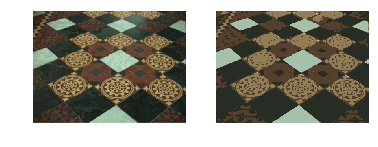

In [35]:
color_mean = color.label2rgb(segmentation, im, kind='mean')
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im)
axes[0].axis('off')
axes[1].imshow(color_mean)
axes[1].axis('off')

In [48]:
im = io.imread('E:/machine learning/Skimage_tutorials/chapel_floor.png')
im_lab = color.rgb2lab(im)
data = np.array([
                 im_lab[..., 0].ravel()])
kmeans = KMeans(n_clusters=4, random_state=0).fit(data.T)
segmentation = kmeans.labels_.reshape(im.shape[:-1])

(-0.5, 375.5, 276.5, -0.5)

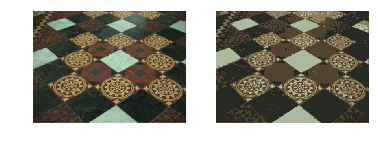

In [49]:
color_mean = color.label2rgb(segmentation, im, kind='mean')
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im)
axes[0].axis('off')
axes[1].imshow(color_mean)
axes[1].axis('off')

# SLIC algorithm

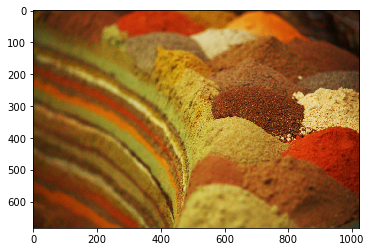

In [50]:
spices = io.imread('E:/machine learning/Skimage_tutorials/spices.jpg')
plt.imshow(spices)

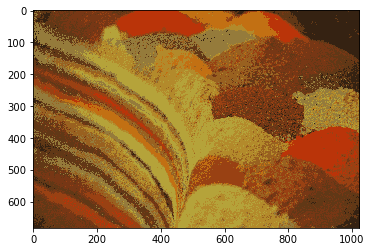

In [51]:
im_lab = color.rgb2lab(spices)
data = np.array([im_lab[..., 1].ravel(),
                 im_lab[..., 2].ravel()])

kmeans = KMeans(n_clusters=10, random_state=0).fit(data.T)
labels = kmeans.labels_.reshape(spices.shape[:-1])
color_mean = color.label2rgb(labels, spices, kind='mean')
plt.imshow(color_mean)

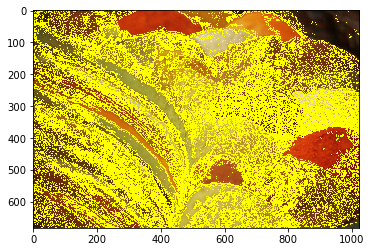

In [52]:
from skimage import segmentation
plt.imshow(segmentation.mark_boundaries(spices, labels))

In [53]:
from skimage import segmentation
segments = segmentation.slic(spices, n_segments=200, compactness=20)

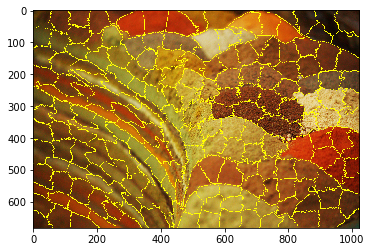

In [54]:
plt.imshow(segmentation.mark_boundaries(spices, segments))

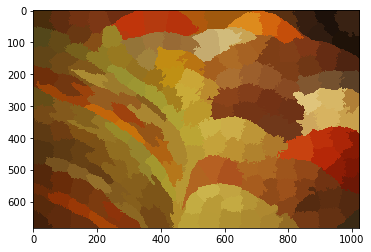

In [55]:
result = color.label2rgb(segments, spices, kind='mean')
plt.imshow(result)

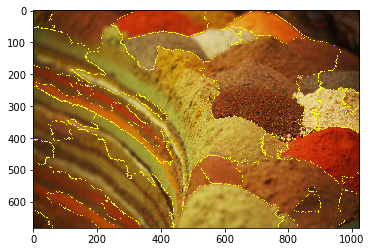

In [56]:
im_lab = color.rgb2lab(result)
data = np.array([im_lab[..., 1].ravel(),
                 im_lab[..., 2].ravel()])

kmeans = KMeans(n_clusters=5, random_state=0).fit(data.T)
labels = kmeans.labels_.reshape(spices.shape[:-1])
color_mean = color.label2rgb(labels, spices, kind='mean')
plt.imshow(segmentation.mark_boundaries(spices, labels))

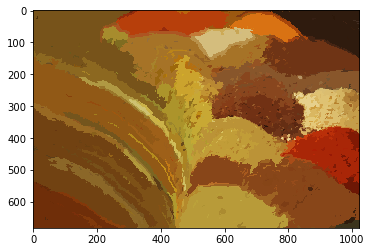

In [57]:
result = segmentation.felzenszwalb(spices, scale=100)
plt.imshow(color.label2rgb(result, spices, kind='mean'))

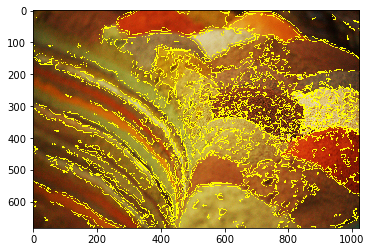

In [58]:
plt.imshow(segmentation.mark_boundaries(spices, result))

## exercise

In [59]:
from skimage import data
astro = data.astronaut()

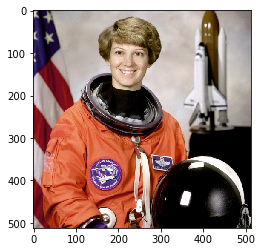

In [61]:
plt.imshow(astro)

AttributeError: 'numpy.ndarray' object has no attribute 'type'

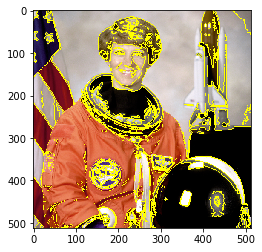

In [76]:
im_lab = color.rgb2lab(astro)
data = np.array([im_lab[..., 0].ravel(),
                 im_lab[..., 1].ravel(),
                 im_lab[..., 2].ravel()])

kmeans = KMeans(n_clusters=5, random_state=0).fit(data.T)
labels = kmeans.labels_.reshape(astro.shape[:-1])
color_mean = color.label2rgb(labels, astro, kind='mean')
plt.imshow(segmentation.mark_boundaries(astro, labels))

(-0.5, 511.5, 511.5, -0.5)

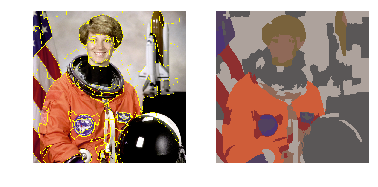

In [77]:
segments = segmentation.slic(astro, n_segments=500, compactness=20)
result = color.label2rgb(segments, astro, kind='mean')
im_lab = color.rgb2lab(result)
data = np.array([im_lab[..., 1].ravel(),
                 im_lab[..., 2].ravel()])
kmeans = KMeans(n_clusters=8, random_state=0).fit(data.T)
labels = kmeans.labels_.reshape(astro.shape[:-1])
color_mean = color.label2rgb(labels, astro, kind='mean')
fig, ax = plt.subplots(1, 2)
ax[0].imshow(segmentation.mark_boundaries(astro, labels))
ax[0].axis('off')
ax[1].imshow(color_mean)
ax[1].axis('off')

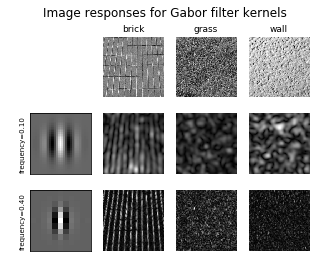

In [78]:
# From http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_gabor.html
from skimage import data, img_as_float
from skimage.filters import gabor_kernel
import scipy.ndimage as ndi

shrink = (slice(0, None, 3), slice(0, None, 3))
brick = img_as_float(data.load('brick.png'))[shrink]
grass = img_as_float(data.load('grass.png'))[shrink]
wall = img_as_float(data.load('rough-wall.png'))[shrink]
image_names = ('brick', 'grass', 'wall')
images = (brick, grass, wall)


def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 +
                   ndi.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for frequency in (0.1, 0.4):
    kernel = gabor_kernel(frequency, theta=0)
    params = 'frequency=%.2f' % (frequency)
    kernel_params.append(params)
    # Save kernel and the power image for each image
    results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(5, 4))
plt.gray()

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

axes[0][0].axis('off')

# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel), interpolation='nearest')
    ax.set_ylabel(label, fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

In [81]:
from sklearn.ensemble import RandomForestClassifier
from skimage import filters
from skimage import img_as_float

def _compute_features(im):
    gabor_frequencies = np.logspace(-3, 1, num=5, base=2)
    thetas = [0, np.pi/2]
    nb_fq = len(gabor_frequencies) * len(thetas)
    im = np.atleast_3d(im)
    im_gabor = np.empty((im.shape[-1], nb_fq) + im.shape[:2])
    for ch in range(im.shape[-1]):
        img = img_as_float(im[..., ch])
        for i_fq, fq in enumerate(gabor_frequencies):
            for i_th, theta in enumerate(thetas):
                tmp = filters.gabor(img, fq, theta=theta)
                im_gabor[ch, len(thetas) * i_fq + i_th] = \
                                    np.abs(tmp[0] + 1j * tmp[1])
    return im_gabor


def trainable_segmentation(im, mask):
    """
    Parameters
    ----------
    
    im : ndarray
        2-D image (grayscale or RGB) to be segmented
        
    mask : ndarray of ints
        Array of labels. Non-zero labels are known regions that are used
        to train the classification algorithm.
    """
    # Define features
    im_gabor = _compute_features(im)     
    nb_ch, nb_fq, sh_1, sh2 = im_gabor.shape
    # Training data correspond to pixels labeled in mask
    training_data = im_gabor[:, :, mask>0]
    training_data = training_data.reshape((nb_ch * nb_fq,
                                         (mask>0).sum())).T
    training_labels = mask[mask>0].ravel()
    # Data are from the remaining pixels
    data = im_gabor[:, :, mask == 0].reshape((nb_ch * nb_fq,
                                              (mask == 0).sum())).T
    # classification
    clf = RandomForestClassifier()
    clf.fit(training_data, training_labels)
    labels = clf.predict(data)
    result = np.copy(mask)
    result[mask == 0] = labels
    return result

In [83]:
# Image from https://fr.wikipedia.org/wiki/Fichier:Bells-Beach-View.jpg
beach = io.imread('E:/machine learning/Skimage_tutorials/Bells-Beach.jpg')

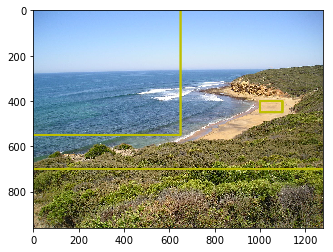

In [84]:
# Define mask of user-labeled pixels, which will be used for training
mask = np.zeros(beach.shape[:-1], dtype=np.uint8)
mask[700:] = 1
mask[:550, :650] = 2
mask[400:450, 1000:1100] = 3
plt.imshow(beach)
plt.contour(mask, colors='y')

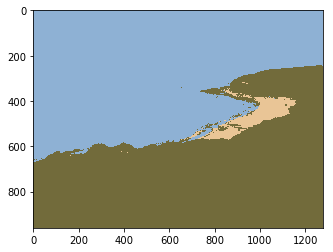

In [85]:
result = trainable_segmentation(beach, mask)
plt.imshow(color.label2rgb(result, beach, kind='mean'))

# using mid-level features

(512, 0)

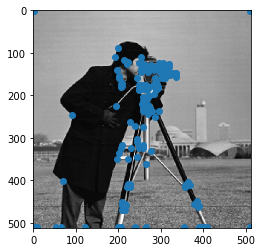

In [86]:
from skimage import data
camera = data.camera()
from skimage import feature
corner_camera = feature.corner_harris(camera)
coords = feature.corner_peaks(corner_camera)
plt.imshow(camera, cmap='gray')
plt.plot(coords[:, 1], coords[:, 0], 'o')
plt.xlim(0, 512)
plt.ylim(512, 0)

# Panorama stitching

In [2]:
from __future__ import division, print_function
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform

from skimage.color import rgb2gray
from skdemo import imshow_all

In [3]:
ic = io.ImageCollection('E:/machine learning/Skimage_tutorials/pano/DFM_*')

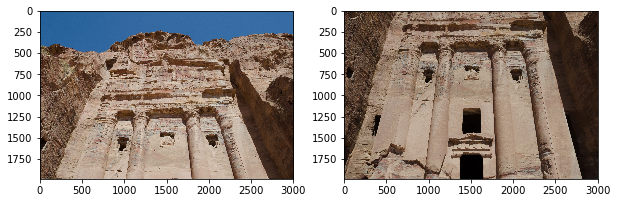

In [4]:
imshow_all(ic[0], ic[1])

In [5]:
image0 = rgb2gray(ic[0][:, 500:500+1987, :])
image1 = rgb2gray(ic[1][:, 500:500+1987, :])

image0 = transform.rescale(image0, 0.25)
image1 = transform.rescale(image1, 0.25)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


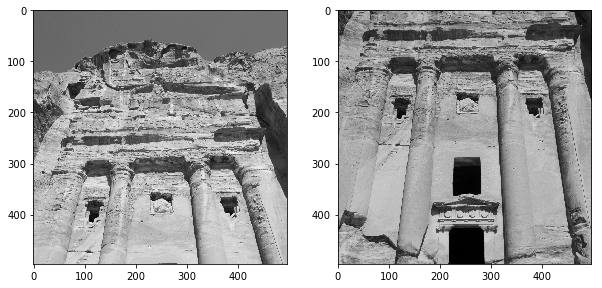

In [6]:
imshow_all(image0, image1)

In [7]:
from skimage.feature import ORB, match_descriptors

orb = ORB(n_keypoints=1000, fast_threshold=0.05)

orb.detect_and_extract(image0)
keypoints1 = orb.keypoints
descriptors1 = orb.descriptors

orb.detect_and_extract(image1)
keypoints2 = orb.keypoints
descriptors2 = orb.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

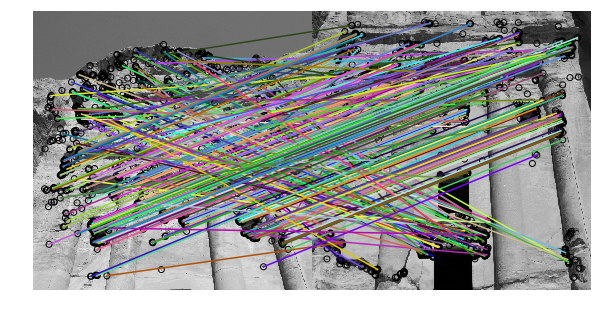

In [8]:
from skimage.feature import plot_matches

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_matches(ax, image0, image1, keypoints1, keypoints2, matches12)
ax.axis('off');

# RANSAC remove outliers

In [9]:
from skimage.transform import ProjectiveTransform
from skimage.measure import ransac
from skimage.feature import plot_matches

# Select keypoints from the source (image to be registered)
# and target (reference image)
src = keypoints2[matches12[:, 1]][:, ::-1]
dst = keypoints1[matches12[:, 0]][:, ::-1]

model_robust, inliers = ransac((src, dst), ProjectiveTransform,
                               min_samples=4, residual_threshold=2)

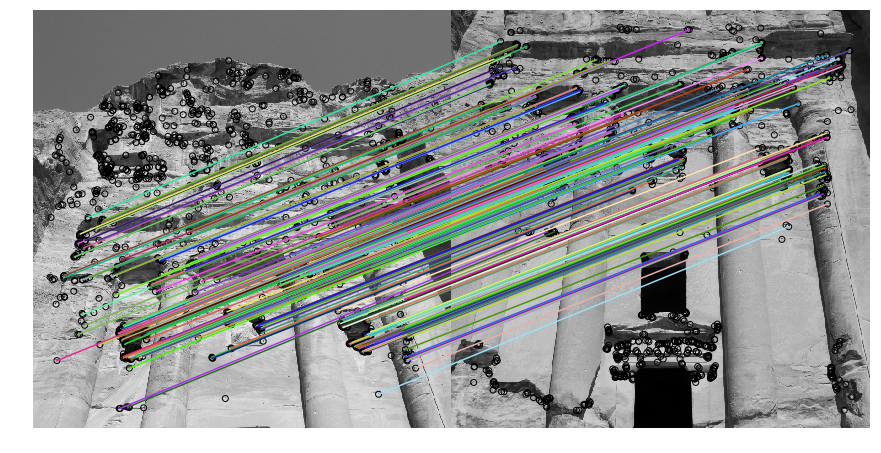

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
plot_matches(ax, image0, image1, keypoints1, keypoints2, matches12[inliers])
ax.axis('off');

In [11]:

from skimage.transform import SimilarityTransform

r, c = image1.shape[:2]

# Note that transformations take coordinates in (x, y) format,
# not (row, column), in order to be consistent with most literature
corners = np.array([[0, 0],
                    [0, r],
                    [c, 0],
                    [c, r]])

# Warp the image corners to their new positions
warped_corners = model_robust(corners)

# Find the extents of both the reference image and the warped
# target image
all_corners = np.vstack((warped_corners, corners))

corner_min = np.min(all_corners, axis=0)
corner_max = np.max(all_corners, axis=0)

output_shape = (corner_max - corner_min)
output_shape = np.ceil(output_shape[::-1])

In [12]:
from skimage.color import gray2rgb
from skimage.exposure import rescale_intensity
from skimage.transform import warp

offset = SimilarityTransform(translation=-corner_min)

image0_ = warp(image0, offset.inverse,
               output_shape=output_shape, cval=-1)

image1_ = warp(image1, (model_robust + offset).inverse,
               output_shape=output_shape, cval=-1)

In [13]:
def add_alpha(image, background=-1):
    """Add an alpha layer to the image.
    
    The alpha layer is set to 1 for foreground and 0 for background.
    """
    return np.dstack((gray2rgb(image), (image != background)))

image0_alpha = add_alpha(image0_)
image1_alpha = add_alpha(image1_)

merged = (image0_alpha + image1_alpha)
alpha = merged[..., 3]

# The summed alpha layers give us an indication of how many
# images were combined to make up each pixel.  Divide by the
# number of images to get an average.
merged /= np.maximum(alpha, 1)[..., np.newaxis]
merged = merged[..., :3]

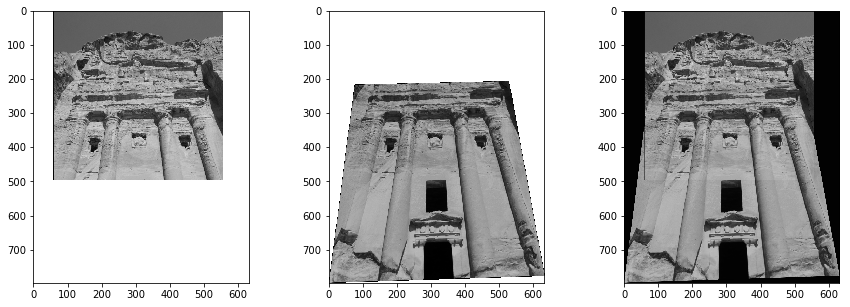

In [14]:
imshow_all(image0_alpha, image1_alpha, merged)